In [1]:
# Import and view the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

customer_churn = pd.read_csv('customer_churn.csv')
customer_churn

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [2]:
# Fit logistic regression model and print coefficients
X = customer_churn[['balance', 'age', 'credit_score']].values.reshape(-1, 3)
y = customer_churn[['churn']].values.reshape(-1, 1).astype(int)

logisticModel = LogisticRegression()
logisticModel.fit(X, np.ravel(y.astype(int)))

print('Slope coefficient:', logisticModel.coef_)
print('Intercept coefficient:', logisticModel.intercept_)

Slope coefficient: [[ 5.03279842e-06  6.33785909e-02 -7.71529759e-04]]
Intercept coefficient: [-3.86114781]


In [5]:
# Make predictions using logistic regression
logisticModel.predict_proba([[10000, 21, 650]])

array([[0.95172507, 0.04827493]])

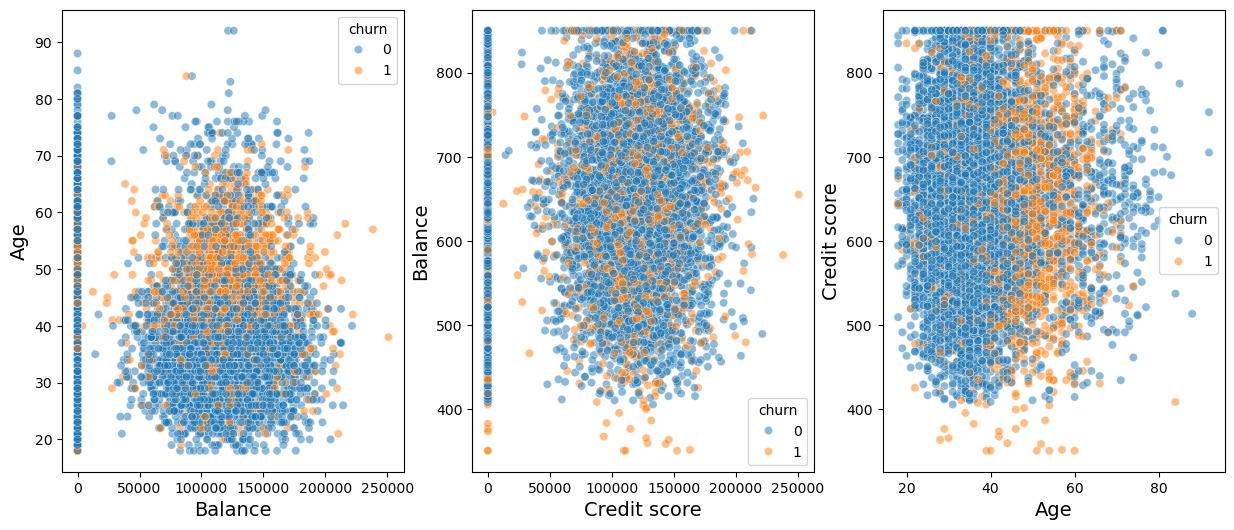

In [7]:
# plt.subplot(rows, columns, plot index)
plt.rcParams["figure.figsize"] = (15, 6)

plt.subplot(1, 3, 1)
p = sns.scatterplot(data=customer_churn, x='balance', y='age', hue='churn', alpha=0.5)
p.set_xlabel('Balance', fontsize=14)
p.set_ylabel('Age', fontsize=14)

plt.subplot(1, 3, 2)
p = sns.scatterplot(
    data=customer_churn, x='balance', y='credit_score', hue='churn', alpha=0.5
)
p.set_ylabel('Balance', fontsize=14)
p.set_xlabel('Credit score', fontsize=14)

plt.subplot(1, 3, 3)
p = sns.scatterplot(
    data=customer_churn, x='age', y='credit_score', hue='churn', alpha=0.5
)
p.set_xlabel('Age', fontsize=14)
p.set_ylabel('Credit score', fontsize=14)
plt.show()